This notebook show how I used EasyOCR to predict number in Super AI Engineer 2021: Handwritten Digit hackatron on 14-16 January 2022.

[Levenshtein Mean](https://en.wikipedia.org/wiki/Levenshtein_distance) are used as an evaluation method during hackatron.

I got 2.82027 Levenshtein Mean in hackatron's test set, showing that we need to insert, delete or change 2.82027 character in average.

### Clone EasyOCR from thier github repository

In [ ]:
pip install git+git://github.com/jaidedai/easyocr.git

  Cloning git://github.com/jaidedai/easyocr.git to /tmp/pip-req-build-xm8y_xpi
  Running command git clone -q git://github.com/jaidedai/easyocr.git /tmp/pip-req-build-xm8y_xpi
     |████████████████████████████████| 47.6 MB 1.4 MB/s 
  Created wheel for easyocr: filename=easyocr-1.4.1-py3-none-any.whl size=63744053 sha256=9fc7a4613e02d87825a8be8766d26d41456c2a9d306e3d87119447059977e83d
  Stored in directory: /tmp/pip-ephem-wheel-cache-06g_pl2w/wheels/e4/17/25/2d203d4a2ecdb8b4d05e4cef1fed51634287906dfafee45701
Successfully built easyocr


### Import modules and mounted data from google drive

In [ ]:
import pandas as pd
from pathlib import Path
from google.colab import drive
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import re
import skimage
from skimage.filters import threshold_otsu
import cv2
from pylab import rcParams
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Prepare data

In [ ]:
SmallTest_dir = Path("/content/drive/MyDrive/Kaggle/HandwrittenDigits/SmallTest")

SmallTest_png_dir = sorted(list(map(str, list(SmallTest_dir.glob("*.png")))))
SmallTest_jpg_dir = sorted(list(map(str, list(SmallTest_dir.glob("*.jpg")))))
SmallTest_jpeg_dir = sorted(list(map(str, list(SmallTest_dir.glob("*.jpeg")))))

SmallTest_images_dir=[*SmallTest_png_dir,*SmallTest_jpg_dir,*SmallTest_jpeg_dir]

TestSet1_dir = Path("/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet1")

TestSet1_png_dir = sorted(list(map(str, list(TestSet1_dir.glob("*.png")))))
TestSet1_jpg_dir = sorted(list(map(str, list(TestSet1_dir.glob("*.jpg")))))
TestSet1_jpeg_dir = sorted(list(map(str, list(TestSet1_dir.glob("*.jpeg")))))

TestSet1_images_dir=[*TestSet1_png_dir,*TestSet1_jpg_dir,*TestSet1_jpeg_dir]

TestSet2_dir = Path("/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet2")

TestSet2_png_dir = sorted(list(map(str, list(TestSet2_dir.glob("*.png")))))
TestSet2_jpg_dir = sorted(list(map(str, list(TestSet2_dir.glob("*.jpg")))))
TestSet2_jpeg_dir = sorted(list(map(str, list(TestSet2_dir.glob("*.jpeg")))))

TestSet2_images_dir=[*TestSet2_png_dir,*TestSet2_jpg_dir,*TestSet2_jpeg_dir]

### Compare EasyOCR's prediction result between original image and preprocess image

(32, 75)
9491 vs 995


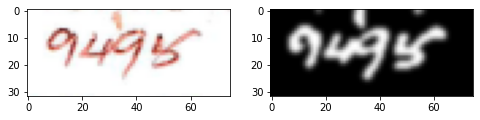

KeyboardInterrupt: ignored

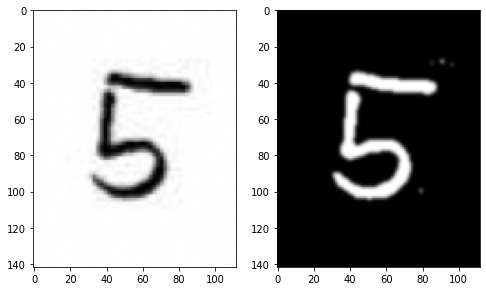

In [ ]:
for path in SmallTest_images_dir:

  img_original = cv2.imread(path)
  img_preprocess = img_original.copy()
  img_preprocess = cv2.cvtColor(img_preprocess, cv2.COLOR_BGR2GRAY)
  img_preprocess = cv2.GaussianBlur(img_preprocess, (5, 5), 1)
  img_preprocess = cv2.adaptiveThreshold(img_preprocess, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
  img_preprocess = cv2.GaussianBlur(img_preprocess, (5, 5), 1)

  fig,ax=plt.subplots(1,2)
  ax[0].imshow(img_original,cmap='gray')
  ax[1].imshow(img_preprocess,cmap='gray')

  rcParams['figure.figsize'] = 8, 16
  reader = easyocr.Reader(['en'])
  print(img_preprocess.shape)

  output_original = reader.readtext(img_original,detail = 0)
  output_preprocess = reader.readtext(img_preprocess,detail = 0)

  predict_original=''
  predict_preprocess=''

  #Post process the prediction result of original images and preprocessed images.
  for output in output_original:
    predict_original+=output

  predict_original=predict_original.replace('I','1')
  predict_original=predict_original.replace('|','1')
  predict_original=predict_original.replace('[','1')
  predict_original=predict_original.replace('/','1')
  predict_original=predict_original.replace('{','1')
  predict_original=predict_original.replace('$','8')
  predict_original=predict_original.replace('&','8')
  predict_original=predict_original.replace('o','0')
  predict_original=predict_original.replace('q','9')
  predict_original=predict_original.replace('(','6')
  predict_original=predict_original.replace('b','6')
  predict_original=re.sub('m|M', '7', predict_original)
  predict_original=predict_original.replace('?','7')
  predict_original=predict_original.replace('+','7')
  predict_original=predict_original.replace('}','3')
  predict_original=predict_original.replace('A','4')
  predict_original=re.sub('s|S', '5', predict_original)
  predict_original=predict_original.replace(' ','')
  predict_original=re.sub('\D', '', predict_original)
  if predict_original=='':
    predict_original=np.nan


  for output in output_preprocess:
    predict_preprocess+=output

  predict_preprocess=predict_preprocess.replace('I','1')
  predict_preprocess=predict_preprocess.replace('|','1')
  predict_preprocess=predict_preprocess.replace('[','1')
  predict_preprocess=predict_preprocess.replace('/','1')
  predict_preprocess=predict_preprocess.replace('{','1')
  predict_preprocess=predict_preprocess.replace('$','8')
  predict_preprocess=predict_preprocess.replace('&','8')
  predict_preprocess=predict_preprocess.replace('o','0')
  predict_preprocess=predict_preprocess.replace('q','9')
  predict_preprocess=predict_preprocess.replace('(','6')
  predict_preprocess=predict_preprocess.replace('b','6')
  predict_preprocess=re.sub('m|M', '7', predict_preprocess)
  predict_preprocess=predict_preprocess.replace('?','7')
  predict_preprocess=predict_preprocess.replace('+','7')
  predict_preprocess=predict_preprocess.replace('}','3')
  predict_preprocess=predict_preprocess.replace('A','4')
  predict_preprocess=re.sub('s|S', '5', predict_preprocess)
  predict_preprocess=predict_preprocess.replace(' ','')
  predict_preprocess=re.sub('\D', '', predict_preprocess)
  if predict_preprocess=='':
    predict_preprocess=np.nan

  print(predict_original,end=' vs ')
  print(predict_preprocess)
  plt.show()
  print('\n')

### Use EasyOCR to predict preprocess images in 3 test sets

In [ ]:
reader=easyocr.Reader(['en'])

name_list=[]
predict_list=[]
for dir in SmallTest_images_dir:
  im_array=plt.imread(dir)
  if im_array.shape[2]>3:
    im_array=im_array[:,:,0:3]

  dot_index=dir.index('.')
  name=dir[58:dot_index]
  print(dir,end='name =')
  print(name)

  img = cv2.imread(dir)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.GaussianBlur(img, (5, 5), 1)
  img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
  img = cv2.GaussianBlur(img, (5, 5), 1)

  result_full=reader.readtext(img,detail = 0)
  if result_full==[]:
    result_digits=''
  else:
    result_digits=''
    for all_predict in result_full:
      result_digits+=all_predict
      if len(all_predict)==max([len(i) for i in result_full]):
        longest_predict=all_predict

  if len(result_digits)>5:
    result_digits=longest_predict
  name_list.append(name)
  predict_list.append(result_digits)

  #print(result_full)
  #print(name,':',result_digits)

/content/drive/MyDrive/Kaggle/HandwrittenDigits/SmallTest/086ccb440e8b74f5f2a7713e0a07bd36.pngname =086ccb440e8b74f5f2a7713e0a07bd36
/content/drive/MyDrive/Kaggle/HandwrittenDigits/SmallTest/0c70bcc07a8ad66aab1c02da089e5bd0.pngname =0c70bcc07a8ad66aab1c02da089e5bd0
/content/drive/MyDrive/Kaggle/HandwrittenDigits/SmallTest/0ecd53702e234cbe43f2fb54bc776b3d.pngname =0ecd53702e234cbe43f2fb54bc776b3d
/content/drive/MyDrive/Kaggle/HandwrittenDigits/SmallTest/0ee2bd42ce02e0fb702617f63173f5b1.pngname =0ee2bd42ce02e0fb702617f63173f5b1
/content/drive/MyDrive/Kaggle/HandwrittenDigits/SmallTest/157ca8516cd8971b492ad3ac99c99c89.pngname =157ca8516cd8971b492ad3ac99c99c89
/content/drive/MyDrive/Kaggle/HandwrittenDigits/SmallTest/1784e6a1b440593a03168b5f4e291ba0.pngname =1784e6a1b440593a03168b5f4e291ba0
/content/drive/MyDrive/Kaggle/HandwrittenDigits/SmallTest/1a4545ae6128dab578f90fb22b55758a.pngname =1a4545ae6128dab578f90fb22b55758a
/content/drive/MyDrive/Kaggle/HandwrittenDigits/SmallTest/1a4fbed5330

In [ ]:
for dir in TestSet1_images_dir:
  im_array=plt.imread(dir)
  if im_array.shape[2]>3:
    im_array=im_array[:,:,0:3]

  dot_index=dir.index('.')
  name=dir[57:dot_index]
  print(dir,end='name =')
  print(name)

  img = cv2.imread(dir)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.GaussianBlur(img, (5, 5), 1)
  img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
  img = cv2.GaussianBlur(img, (5, 5), 1)

  result_full=reader.readtext(img,detail = 0)
  if result_full==[]:
    result_digits=''
  else:
    result_digits=''
    for all_predict in result_full:
      result_digits+=all_predict
      if len(all_predict)==max([len(i) for i in result_full]):
        longest_predict=all_predict

  if len(result_digits)>5:
    result_digits=longest_predict
  name_list.append(name)
  predict_list.append(result_digits)

  #print(result_full)
  #print(name,':',result_digits)

/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet1/00390a98255151cb851161b87a302413.pngname =00390a98255151cb851161b87a302413
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet1/00b2c4ea8a313583a6e1be0ab95fa6ef.pngname =00b2c4ea8a313583a6e1be0ab95fa6ef
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet1/03d1e8539f0bdfecccd572969cfc8dbf.pngname =03d1e8539f0bdfecccd572969cfc8dbf
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet1/0423ee4370faae38d6278baab3d1fd2d.pngname =0423ee4370faae38d6278baab3d1fd2d
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet1/0445aeaf84845e1d357b486a783f604f.pngname =0445aeaf84845e1d357b486a783f604f
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet1/05af9789047aa49e3e8aba74a87d5c00.pngname =05af9789047aa49e3e8aba74a87d5c00
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet1/06da6c71861309e84c5d6754af1d8328.pngname =06da6c71861309e84c5d6754af1d8328
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet1/07584453c962d7fd1d5

In [ ]:
for dir in TestSet2_images_dir:
  im_array=plt.imread(dir)
  if im_array.shape[2]>3:
    im_array=im_array[:,:,0:3]

  dot_index=dir.index('.')
  name=dir[57:dot_index]
  print(dir,end='name =')
  print(name)

  img = cv2.imread(dir)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.GaussianBlur(img, (5, 5), 1)
  img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
  img = cv2.GaussianBlur(img, (5, 5), 1)

  result_full=reader.readtext(img,detail = 0)
  if result_full==[]:
    result_digits=''
  else:
    result_digits=''
    for all_predict in result_full:
      result_digits+=all_predict
      if len(all_predict)==max([len(i) for i in result_full]):
        longest_predict=all_predict

  if len(result_digits)>5:
    result_digits=longest_predict
  name_list.append(name)
  predict_list.append(result_digits)

  #print(result_full)
  #print(name,':',result_digits)

/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet2/004c1ebd789f053fa997bbb7251da1f9.pngname =004c1ebd789f053fa997bbb7251da1f9
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet2/004d54be0db9e3fc021c95724b7c2b0d.pngname =004d54be0db9e3fc021c95724b7c2b0d
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet2/007e62ad36ae31f8cd7c5ded1a70a0e4.pngname =007e62ad36ae31f8cd7c5ded1a70a0e4
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet2/008daab67f96b475aa6a3d31c5478f7e.pngname =008daab67f96b475aa6a3d31c5478f7e
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet2/00b5becf236fe77f06602fe9e856e8a9.pngname =00b5becf236fe77f06602fe9e856e8a9
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet2/00f315a4b714ac515add273a408adc05.pngname =00f315a4b714ac515add273a408adc05
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet2/0121ccaad3507e92b8ea4e67f93ddd76.pngname =0121ccaad3507e92b8ea4e67f93ddd76
/content/drive/MyDrive/Kaggle/HandwrittenDigits/TestSet2/023dfdff0f01cd3bef9

### Post process the previous prediction result

In [ ]:
postprocess_predict_list=[]
for predict in predict_list:
  predict=predict.replace('I','1')
  predict=predict.replace('|','1')
  predict=predict.replace('[','1')
  predict=predict.replace('/','1')
  predict=predict.replace('{','1')
  predict=predict.replace('$','8')
  predict=predict.replace('&','8')
  predict=predict.replace('o','0')
  predict=predict.replace('q','9')
  predict=predict.replace('(','6')
  predict=predict.replace('b','6')
  predict=re.sub('m|M', '7', predict)
  predict=predict.replace('?','7')
  predict=predict.replace('+','7')
  predict=predict.replace('}','3')
  predict=predict.replace('A','4')
  predict=re.sub('s|S', '5', predict)
  predict=predict.replace(' ','')
  predict=re.sub('\D', '', predict)
  if predict=='':
    predict='-1'
  postprocess_predict_list.append(predict)

### Create dataframe with image's name column and prediction result column and summit dataframe to hackatron

In [ ]:
sample=pd.read_csv('/content/drive/MyDrive/Kaggle/HandwrittenDigits/sample_submission.csv')

df=pd.DataFrame({'Id':name_list,'Predicted':postprocess_predict_list})

submission=sample.merge(df,how='left',on='Id',suffixes=('_sample',''))
submission.drop('Predicted_sample',axis=1,inplace=True)
submission.set_index('Id',inplace=True)
submission['Predicted']=submission['Predicted'].astype(str)
submission.to_csv('submission.csv')